### 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org

### 기본 그래프

선(line), 막대(bar), 히스토그램(histogram), 산포도(scatterplot), 상자(boxplot)

#### 1) 질적 데이터
    - 요약 방법 : 도표
    - 정리 방법 : 도수 분포표, 분할표
    - 그래프 : 막대 그래프, 원 그래프, ...

#### 2) 양적 데이터
    - 요약 방법 : 수치
    - 정리 방법 : 산술평균, 중앙값, ...
    - 그래프 : 히스토그램, Boxplot, 시계열(선) 그래프, 산포도(산점도)

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/나눔고딕.ttf').get_name() #한글이 꺠지지않고 나오도록
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

### 선 그래프

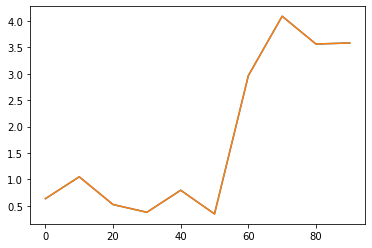

In [8]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10)) #cumsum : 누적
s
s.plot()
s.plot.line()

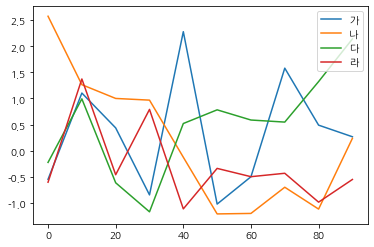

In [20]:
df1 = pd.DataFrame(np.random.randn(10,4), columns=['가','나','다','라'],
            index=np.arange(0,100,10))
df1
df1.plot()

### 막대그래프

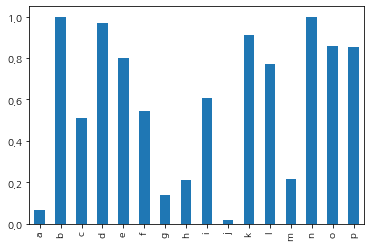

In [24]:
s2 = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
s2
s2.plot(kind='bar')
s2.plot.bar()

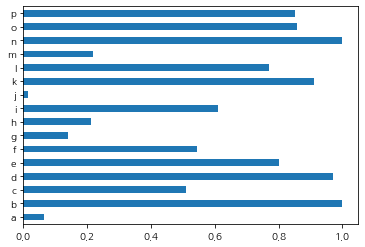

In [26]:
s2.plot(kind='barh') #수평막대그래프
s2.plot.barh()

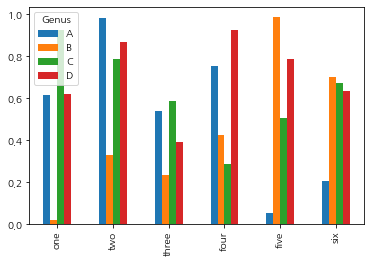

In [33]:
df2 = pd.DataFrame(np.random.rand(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns=pd.Index(['A','B','C','D'], name='Genus'))
df2

df2.plot(kind='bar')

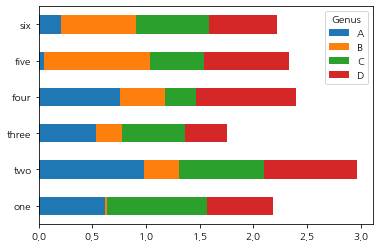

In [34]:
# stack 옵션 ; 하나의 그래프로 쌓아올린다
df2.plot(kind='barh', stacked=True)

### 히스토그램
+ X변수가 가질 수 있는 값의 범위
+ 값만 필요하고 인덱스는 필요없다.

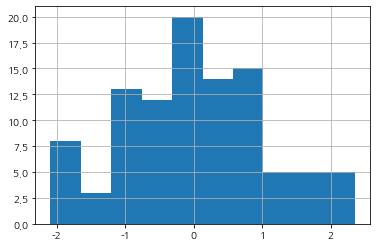

In [38]:
s = pd.Series(np.random.normal(0,1,size=100)) # 정규분포에서 난수를 뽑는 함수
s
s.hist() # 연속형

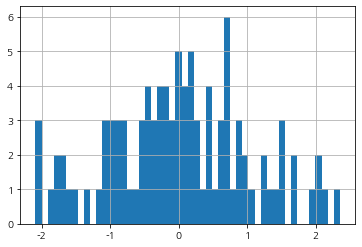

In [39]:
s.hist(bins=50) #막대개수 50개로; 자세한 관찰 가능

### 산포도(Scatter plot)
- 두 변수의 관계를 확인 : 양, 음

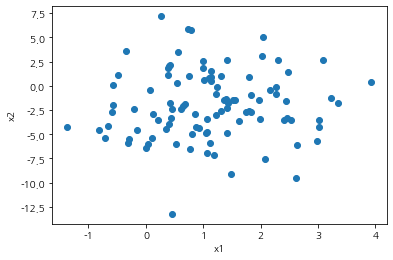

In [50]:
x1 = np.random.normal(1, 1, size=(100,1)) #100행 1열의 데이터
x1

x2 = np.random.normal(-2, 4 ,size=(100,1))
x2

x= np.concatenate((x1,x2), axis=1)
x[:5]

df = pd.DataFrame(x, columns=['x1','x2'])
df.head()

# 산점도 그리는 두 가지 방법
df.plot.scatter('x1','x2') #관계가 없다
plt.scatter(df['x1'], df['x2'])

### 상자 그래프(Box plot)

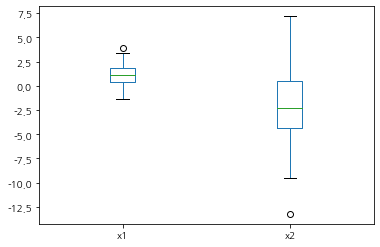

In [52]:
df.plot.box()

---
### matplotlib를 이용한 그래프 그리기

In [15]:
# 데이터준비
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


NameError: name 'total' is not defined

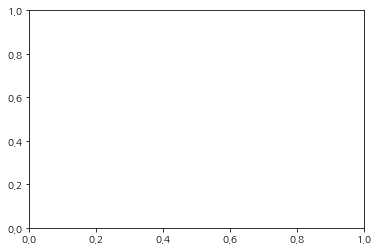

In [19]:
fig = plt.figure()     #기본그래프
ax = fig.add_subplot(1,1,1) #한 화면에 여러 개의 그래프를 그리기(축)

# total_bill에 대한 금액 분포 확인
ax.hist(tips[total])

Text(0, 0.5, 'Tip')

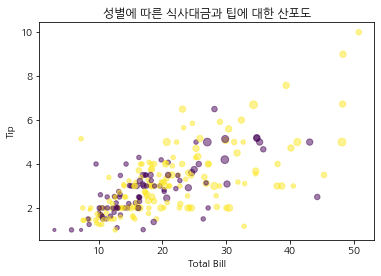

In [61]:
# 성별에 따른 tip과 total_bill의 관계
def record_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
    
tips['sex_color'] = tips['sex'].apply(record_sex)
tips.head()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(tips['total_bill'], tips['tip'], c= tips['sex_color'],
          s = tips['size']*10, #점의 크기로 인원수 표현
          alpha=0.5) #투명도
ax.set_title('성별에 따른 식사대금과 팁에 대한 산포도')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

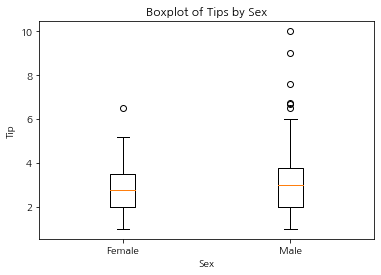

In [24]:
# 성별과 tip의 관계

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.boxplot([tips[tips['sex']=='Female']['tip'], tips[tips['sex']=='Male']['tip']],
          labels = ['Female','Male'])
ax.set_title('Boxplot of Tips by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Tip')

### seaborn

In [3]:
tips = sns.load_dataset('tips')

Text(0, 0.5, 'Total Bill')

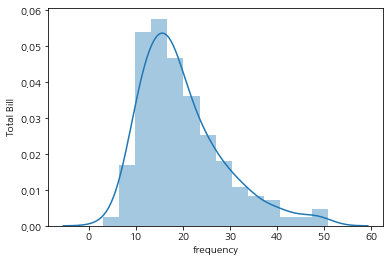

In [5]:
ax = plt.subplot(1,1,1)
ax = sns.distplot(tips['total_bill'])
ax.set_xlabel('frequency')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

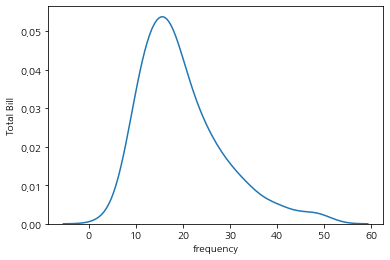

In [6]:
# 위 그래프에서 분포만 보고싶을 때
ax = plt.subplot(1,1,1)
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_xlabel('frequency')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

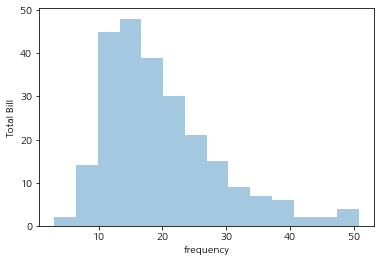

In [7]:
ax = plt.subplot(1,1,1)
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_xlabel('frequency')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

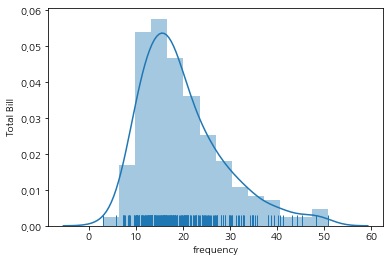

In [8]:
ax = plt.subplot(1,1,1)
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_xlabel('frequency')
ax.set_ylabel('Total Bill')

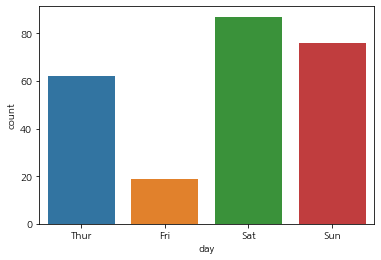

In [9]:
sns.countplot('day', data=tips)

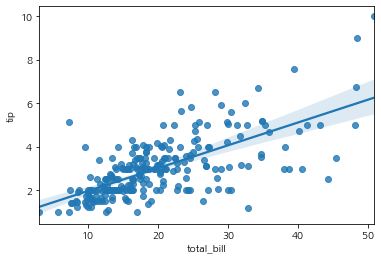

In [10]:
sns.regplot(x='total_bill', y = 'tip', data=tips)

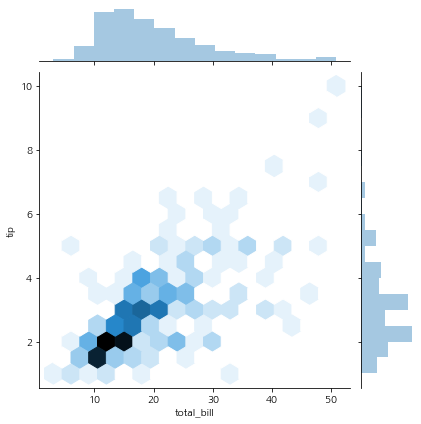

In [12]:
sns.jointplot(x='total_bill', y = 'tip', data=tips, kind='hex') #산포도와 히스토그램 join

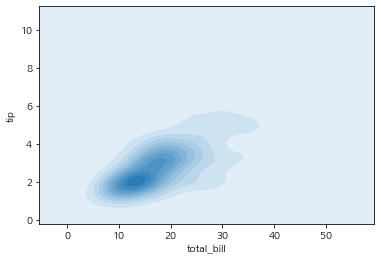

In [14]:
sns.kdeplot(data =tips['total_bill'], data2=tips['tip'], shade=True)

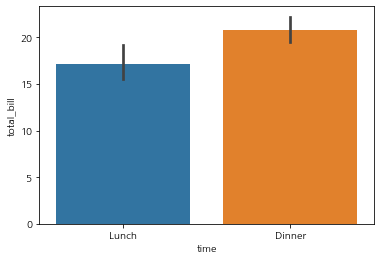

In [15]:
sns.barplot(x='time', y='total_bill', data=tips)

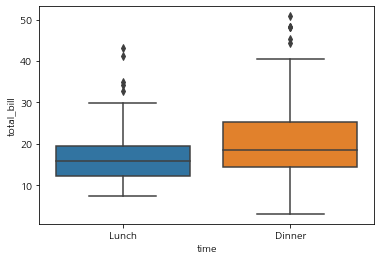

In [18]:
sns.boxplot(x="time", y="total_bill", data=tips)

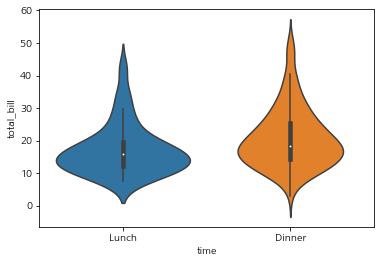

In [19]:
sns.violinplot(x='time', y='total_bill', data=tips) #바이올린 모양

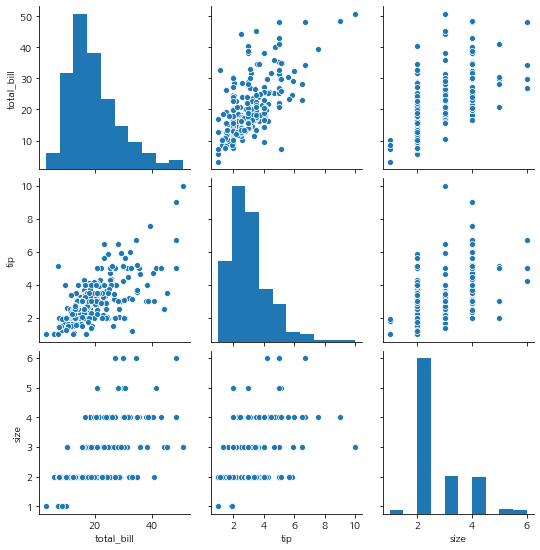

In [20]:
sns.pairplot(tips)

### seaborn

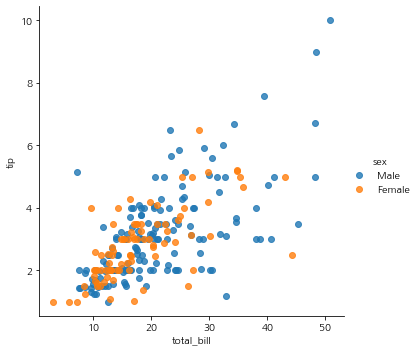

In [10]:
# 성별로 전체 식사대금과 팁의 관계 확인
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex')

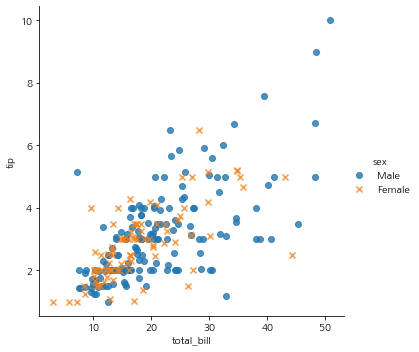

In [12]:
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
          markers=['o','x'])

---
### 지도 시각화
- pip install folium

In [13]:
!pip install folium

In [3]:
import folium

In [4]:
map = folium.Map(location=[37.501826, 127.039780])
map = folium.Map(location=[37.501826, 127.039780], zoom_start=15)
map

In [5]:
map = folium.Map(location=[37.501826, 127.039780], zoom_start=15,
                tiles = 'Stamen Toner')
map

In [6]:
state_unemp = pd.read_csv('data/map/folium_US_Unemployment_Oct2012.csv')
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [7]:
state_geo = 'data/map/folium_us-states.json'

map = folium.Map(location=[40, -98], zoom_start = 4)
map.choropleth(geo_data=state_geo, data=state_unemp, key_on='feature.id',
              columns=['State','Unemployment'], fill_color='YlGn')
map

C:\Users\User_\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [8]:
# marker
map = folium.Map(location=[37.501826, 127.039780], zoo_start=15)
map
                 
#marker = folium.Marker(location=[37.501826, 127.039780],
#                       icon=folium.Icon(color='red', icon='star'))
#marker.add_to(map)

folium.Marker(location=[37.501826, 127.039780], popup='역삼역 근처',
             icon=folium.Icon(color='red', icon='star')).add_to(map)              
map

folium.CircleMarker(location=[37.501826, 127.039780], popup='역삼역 근처',
                   radius=50, color='#ffffgg', fill_color='fffgg').add_to(map)
map

#map.save('data/map/map.html')

### Wordcloud
- pip install wordcloud

In [20]:
!pip install wordcloud

In [9]:
from wordcloud import WordCloud, STOPWORDS

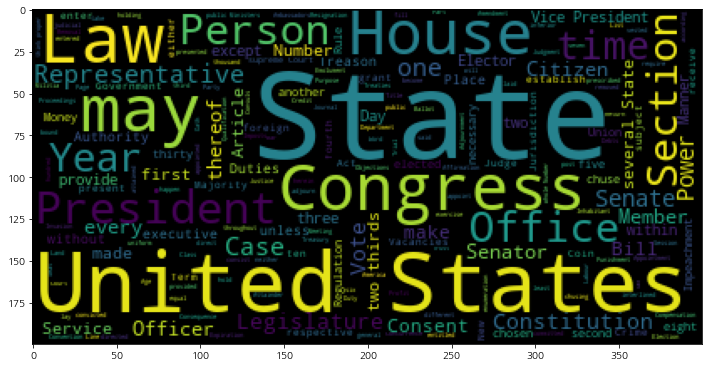

In [10]:
text = open('data/wordcloud/constitution.txt')
text = text.read()
text

wordcloud = WordCloud().generate(text)
dir(wordcloud)
wordcloud.words_

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

(-0.5, 399.5, 199.5, -0.5)

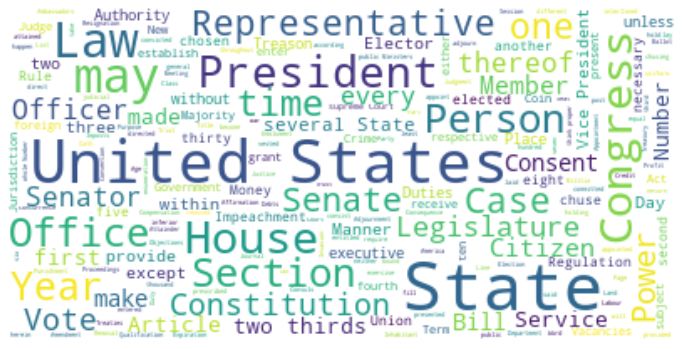

In [23]:
wordcloud = WordCloud(max_font_size=40, background_color='white').generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') #눈금없애기

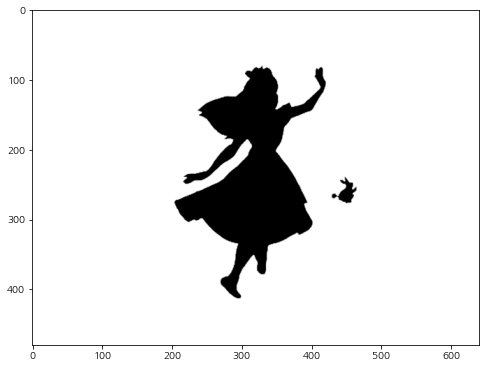

In [19]:
from PIL import Image

alice_mask = np.array(Image.open('data/wordcloud/alice_mask.png'))
alice_mask

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

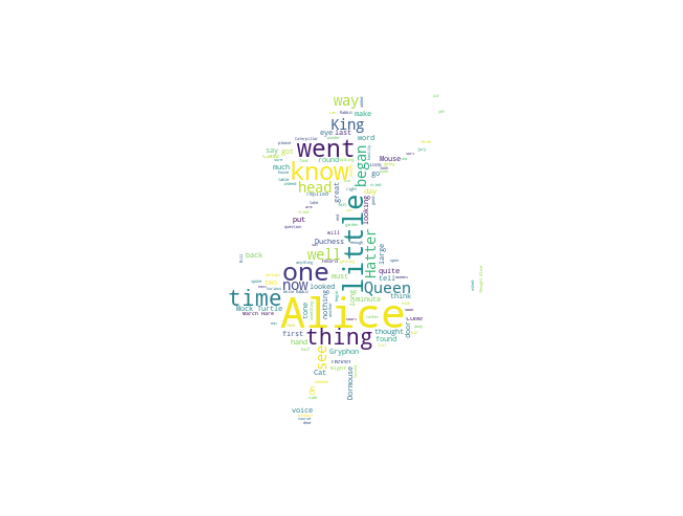

In [20]:
text = open('data/wordcloud/alice.txt').read()
text
stopwords = set(STOPWORDS)
stopwords.add('said')

wordcloud = WordCloud(max_font_size=40, background_color = 'white',
                     mask = alice_mask, stopwords=stopwords,
                     max_words = 500).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

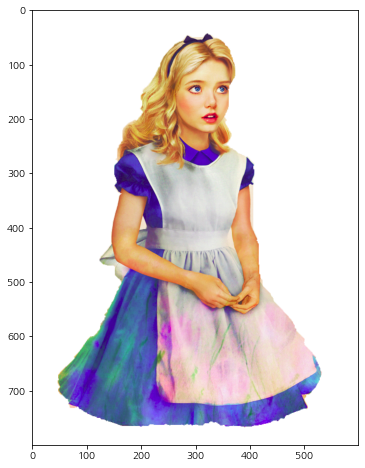

In [21]:
alice_color = np.array(Image.open('data/wordcloud/alice.png'))
alice_color

plt.figure(figsize=(8,8))
plt.imshow(alice_color)

(-0.5, 599.5, 799.5, -0.5)

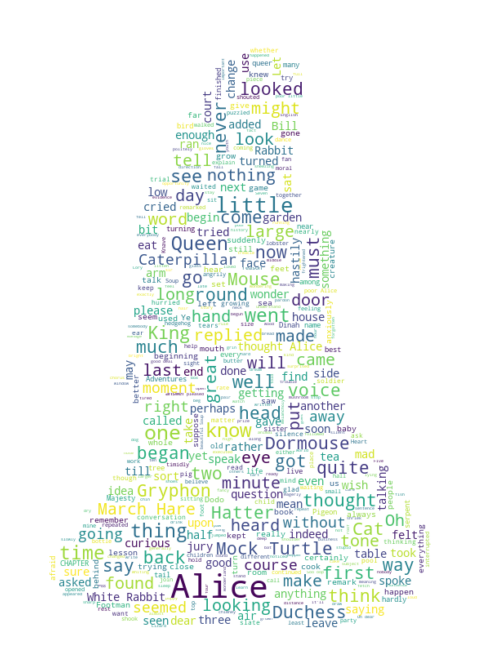

In [22]:
wordcloud = WordCloud(max_font_size=40, background_color = 'white',
                     mask = alice_color, stopwords=stopwords,
                     max_words = 500).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 799.5, -0.5)

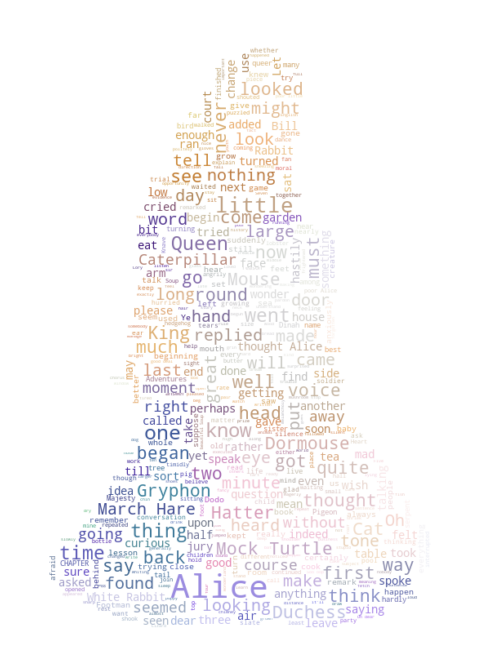

In [23]:
from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(alice_color)

# 앨리스 색에 맞게 출력
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')

In [ ]:
# http://konlpy.org
# pip install knlpy

In [24]:
!pip install konlpy

In [11]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk

In [14]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

# 불용어 처리
stop_words = ['제','월','일','조','수','때','그','이','바','및','안','정','위','관']

# 형태소 분석
t = Okt()
ko_token = t.nouns(ko_text)
ko_token = [each_word for each_word in token_ko if each_word not in stop_words]

# 워드 카운팅
ko = nltk.Text(token_ko, name = '대한민국 헌법')
data = ko.vocab().most_common(50)

wordcloud = WordCloud(background_color='white',
                      font_path='C:/Windows/Fonts/나눔고딕.ttf').generate_from_frequencies(dict(data))

plt.figure(figsize = (12,12))
plt.imshow(wrdcloud, interpolation='bilinear'))
plt.axis('off')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Program Files\\Java\\jre7\\bin\\client\\jvm.dll'

In [25]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Twitter

In [26]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정